<img src="mrc.png" alt="Description de l'image" width="1400" height="100">

## <span style="color: red;">Alert FISSA Study</span>

### <span style="color: red;">Data Exploration and Descriptive Statistics</span>

#### <span style="color: red;">Load Packages</span>

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns  
import missingno as msn   
import janitor
import re     
from dateutil import parser
# Install local package using "pip install -e . --config-setting editable_mode=compat"
import src  
from src.clean import load_data_and_dict       
from collections import Counter
import os
from dotenv import load_dotenv

#### <span style="color: red;"> Load the dataset and initial overview</span>

In [2]:
# Load the west africa data 
load_dotenv()

df = pd.read_csv(os.getenv('CLEAN_DATA_FILE_PATH'))

# Shape of the data
print(f"Shape of the data: {df.shape}")

Shape of the data: (326, 674)


**The  dataset contains 222 rows, representing the number of observations, and  45 columns, representing the number of variables.**

#### <span style="color: red;"> Distribion of sample by gender </span>

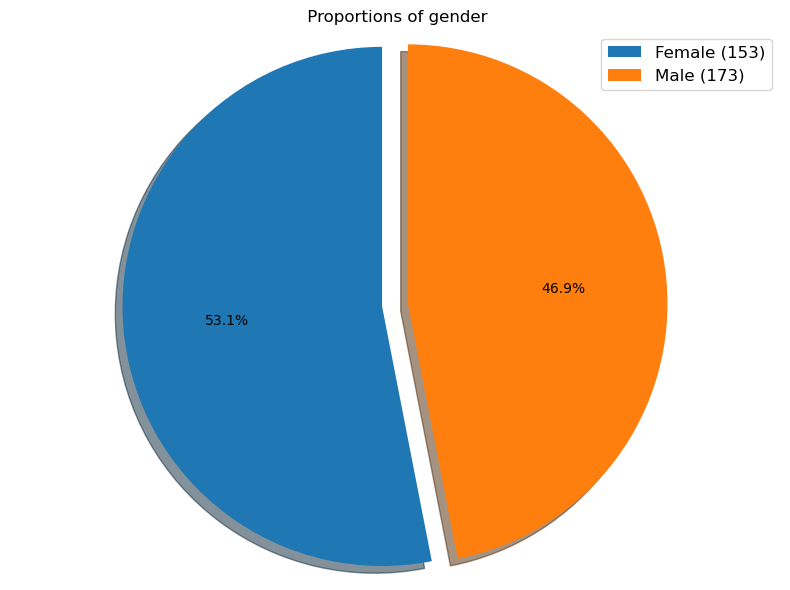

In [3]:
# Count the occurrences and proportions of each gender
gender_counts = df['sexe'].value_counts()
proportions = df['sexe'].value_counts(normalize=True) * 100

# Define labels and colors for the pie chart
labels = [f'Female ({gender_counts[2]})', f'Male ({gender_counts[1]})']
colors = ['#1f77b4', '#ff7f0e']

# Create and style the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True, explode=(0.1, 0))
#plt.title('Proportions of Gender', fontsize=22, weight='bold', y=1.02)
plt.legend(labels, loc='upper right', fontsize=12)

# Save and display the chart
plt.title(' Proportions of gender')
plt.axis('equal') 
plt.tight_layout()
plt.savefig('/Users/asani/Downloads/HDWRA/alerrt_fissa/results/Gender_Proportions.png', dpi=300)
plt.show()

**The dataset contains 326 individuals, of which 153 are female, representing 46.9%, while 173 are male, accounting for 53.1%.**

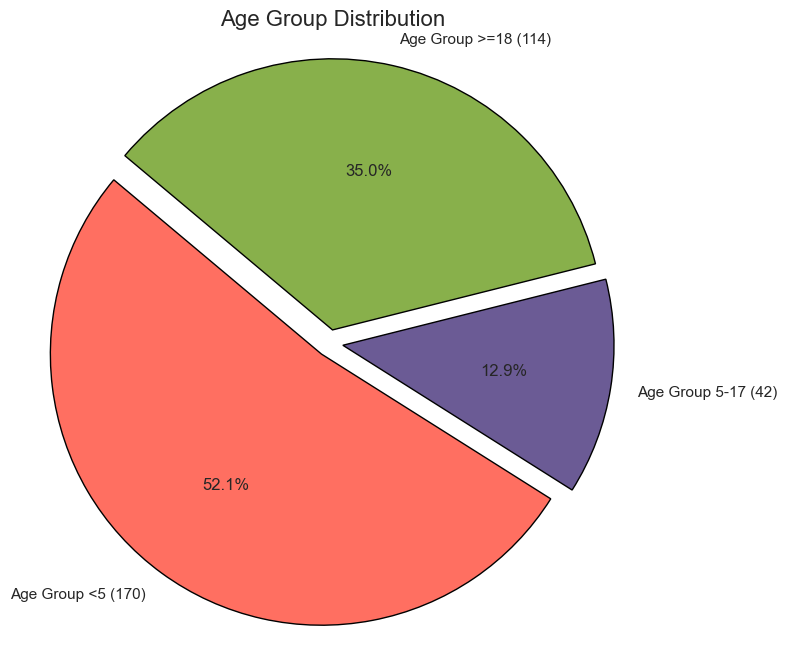

In [4]:
# Apply Seaborn style
sns.set_theme(style="whitegrid")

# Create age groups (<5, 5-17, >=18)
def age_group(age):
    if age < 5:
        return '<5'
    elif 5 <= age < 18:
        return '5-17'
    else:
        return '>=18'

df['age_group'] = df['age'].apply(age_group)

# Count the occurrences of each age group
age_group_counts = df['age_group'].value_counts().reindex(['<5', '5-17', '>=18'])

# Colors
colors = ['#FF6F61', '#6B5B95', '#88B04B']  # coral, purple, green

# Labels
labels = [f'Age Group {group} ({count})' for group, count in age_group_counts.items()]

# Explode each slice (slightly separated)
explode = (0.05, 0.05, 0.05)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, wedgeprops={'edgecolor':'black'}, explode=explode)
plt.title('Age Group Distribution', fontsize=16)
plt.axis('equal')  
plt.savefig('/Users/asani/Downloads/HDWRA/alerrt_fissa/results/age_group_distribution.png', dpi=300)
plt.show()


#### <span style="color: red;"> Pyramid population </span>

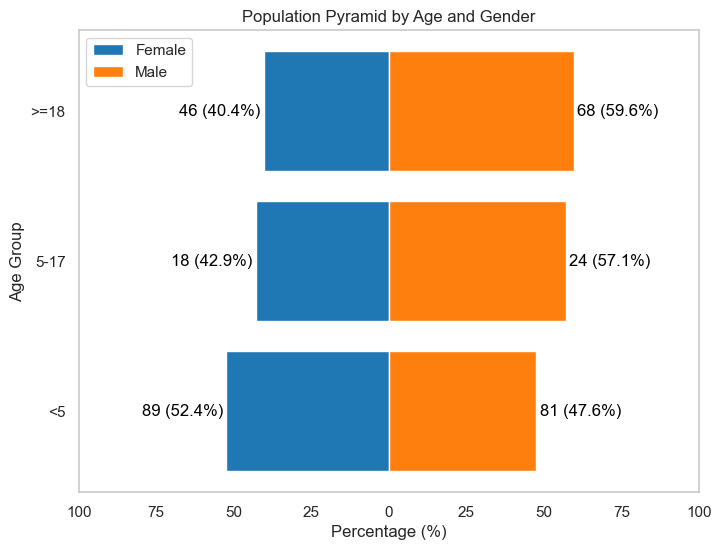

In [6]:
# Apply Seaborn style
sns.set_theme(style="whitegrid")

# Count number of males and females in each age group
age_sex_counts = df.groupby(['age_group', 'sexe']).size().unstack(fill_value=0)

# Convert counts to percentages within each age group
age_sex_percent = age_sex_counts.div(age_sex_counts.sum(axis=1), axis=0) * 100

# Define age group order
age_groups = ['<5', '5-17', '>=18']

# Extract male and female percentages
male_percent = age_sex_percent.loc[age_groups, 1]      
female_percent = -age_sex_percent.loc[age_groups, 2] 

# Plot population pyramid
plt.figure(figsize=(8, 6))
bars_female = plt.barh(age_groups, female_percent, color='#1f77b4', label='Female')  
bars_male = plt.barh(age_groups, male_percent, color='#ff7f0e', label='Male')       

# Add counts and percentages at the end of each bar
for i, age_group in enumerate(age_groups):
    # Female: n (%)
    female_count = age_sex_counts.at[age_group, 2]
    female_pct = abs(female_percent.iloc[i])
    plt.text(female_percent.iloc[i]-1, i, f'{female_count} ({female_pct:.1f}%)',
             va='center', ha='right', color='black')
    
    # Male: n (%)
    male_count = age_sex_counts.at[age_group, 1]
    male_pct = male_percent.iloc[i]
    plt.text(male_percent.iloc[i]+1, i, f'{male_count} ({male_pct:.1f}%)',
             va='center', ha='left', color='black')

plt.xlabel('Percentage (%)')
plt.ylabel('Age Group')
plt.title('Population Pyramid by Age and Gender')
plt.xticks(range(-100, 101, 25), [abs(x) for x in range(-100, 101, 25)])
plt.legend(loc='upper left')
plt.grid(False)
plt.savefig('/Users/asani/Downloads/HDWRA/alerrt_fissa/results/population_pyramid.png', dpi=300)
plt.show()